<a href="https://colab.research.google.com/github/theNahraf/Hydroponics_Plant_Deep_learning/blob/main/DeepLearning_CNN_Hydroponics_Lab_plant_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
 Ascorbic_1_set_1 = os.listdir("/content/drive/MyDrive/New leaf jpg/Ascorbic 1 Set 1")

In [ ]:
print(Ascorbic_1_set_1[: 5])
print(len(Ascorbic_1_set_1))

['IMG_2176.jpg', 'IMG_2181.jpg', 'IMG_2174.jpg', 'IMG_2175.jpg', 'IMG_2180.jpg']
230


In [ ]:
Ascorbic_2_set_2 = os.listdir("/content/drive/MyDrive/New leaf jpg/Ascorbic 2 Set 2")

In [ ]:
print(Ascorbic_2_set_2[: 5])
print(len(Ascorbic_2_set_2))

['IMG_2430.jpg', 'IMG_2426.jpg', 'IMG_2431.jpg', 'IMG_2423.jpg', 'IMG_2427.jpg']
253


In [ ]:
Ascorbic_3_set_3 = os.listdir("/content/drive/MyDrive/New leaf jpg/Ascorbic 3 Set 3")

In [ ]:
print(Ascorbic_3_set_3[: 5])
print(len(Ascorbic_3_set_3))

['IMG_2714.jpg', 'IMG_2707.jpg', 'IMG_2704.jpg', 'IMG_2703.jpg', 'IMG_2717.jpg']
264


In [ ]:
Chitosan_1_Set_1 = os.listdir("/content/drive/MyDrive/New leaf jpg/Chitosan 1 Set 1")

In [ ]:
Chitosan_2_Set_2 = os.listdir("/content/drive/MyDrive/New leaf jpg/Chitosan 2 Set 2")

In [ ]:
Chitosan_3_Set_3 = os.listdir("/content/drive/MyDrive/New leaf jpg/Chitosan 3 Set 3")

In [ ]:
Citric_1_Set_1 = os.listdir("/content/drive/MyDrive/New leaf jpg/Citric 1 Set 1")

In [ ]:
Citric_2_Set_2 = os.listdir("/content/drive/MyDrive/New leaf jpg/Citric 2 Set 2")

In [ ]:
Citric_3_Set_3 = os.listdir("/content/drive/MyDrive/New leaf jpg/Citric 3 Set 3")

In [ ]:
Control_1_Set_1 = os.listdir("/content/drive/MyDrive/New leaf jpg/Control 1 Set 1")

In [ ]:
Control_2_Set_2 = os.listdir("/content/drive/MyDrive/New leaf jpg/Control 2 Set 2")

In [ ]:
Control_3_Set_3 = os.listdir("/content/drive/MyDrive/New leaf jpg/Control 3 Set 3")

# Sweet Basil Treatment and Chemical Composition Analysis

In [ ]:
import pandas as pd

# Finalized data with all Control sets included
data = {
    'Category': [
        'Ascorbic_1_Set_1', 'Ascorbic_2_Set_2', 'Ascorbic_3_Set_3',
        'Citric_1_Set_1', 'Citric_2_Set_2', 'Citric_3_Set_3',
        'Chitosan_1_Set_1', 'Chitosan_2_Set_2', 'Chitosan_3_Set_3',
        'Control_1_Set_1', 'Control_2_Set_2', 'Control_3_Set_3'
    ],
    'Tannin': [44.8, 46.2, 51.4, 64.2, 69.3, 72.3, 53.4, 64.8, 79.0, 68.7, 71.4, 69.4],
    'Phenolic': [67.4, 58.9, 68.3, 60.1, 71.6, 87.4, 66.8, 82.9, 88.3, 55.9, 59.0, 61.2],
    'Flavonoid': [12.1, 15.3, 17.4, 0.80, 1.06, 3.38, 0.85, 1.09, 2.85, 7.35, 8.03, 8.50]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

            Category  Tannin  Phenolic  Flavonoid
0   Ascorbic_1_Set_1    44.8      67.4      12.10
1   Ascorbic_2_Set_2    46.2      58.9      15.30
2   Ascorbic_3_Set_3    51.4      68.3      17.40
3     Citric_1_Set_1    64.2      60.1       0.80
4     Citric_2_Set_2    69.3      71.6       1.06
5     Citric_3_Set_3    72.3      87.4       3.38
6   Chitosan_1_Set_1    53.4      66.8       0.85
7   Chitosan_2_Set_2    64.8      82.9       1.09
8   Chitosan_3_Set_3    79.0      88.3       2.85
9    Control_1_Set_1    68.7      55.9       7.35
10   Control_2_Set_2    71.4      59.0       8.03
11   Control_3_Set_3    69.4      61.2       8.50


# Extract and Store Sweet Basil Chemical Readings with Image Paths

In [ ]:
import os
import pandas as pd

# 📍 Your finalized chemical readings (Ascorbic, Citric, Chitosan, Control)
chemical_readings = {
    'Ascorbic_1_Set_1': {'Flavonoid': 12.1, 'Phenolic': 67.4, 'Tannin': 44.8},
    'Ascorbic_2_Set_2': {'Flavonoid': 15.3, 'Phenolic': 58.9, 'Tannin': 46.2},
    'Ascorbic_3_Set_3': {'Flavonoid': 17.4, 'Phenolic': 68.3, 'Tannin': 51.4},
    'Citric_1_Set_1':   {'Flavonoid': 0.80, 'Phenolic': 60.1, 'Tannin': 64.2},
    'Citric_2_Set_2':   {'Flavonoid': 1.06, 'Phenolic': 71.6, 'Tannin': 69.3},
    'Citric_3_Set_3':   {'Flavonoid': 3.38, 'Phenolic': 87.4, 'Tannin': 72.3},
    'Chitosan_1_Set_1': {'Flavonoid': 0.85, 'Phenolic': 66.8, 'Tannin': 53.4},
    'Chitosan_2_Set_2': {'Flavonoid': 1.09, 'Phenolic': 82.9, 'Tannin': 64.8},
    'Chitosan_3_Set_3': {'Flavonoid': 2.85, 'Phenolic': 88.3, 'Tannin': 79.0},
    'Control_1_Set_1':  {'Flavonoid': 7.35, 'Phenolic': 55.9, 'Tannin': 68.7},
    'Control_2_Set_2':  {'Flavonoid': 8.03, 'Phenolic': 59.0, 'Tannin': 71.4},
    'Control_3_Set_3':  {'Flavonoid': 8.50, 'Phenolic': 61.2, 'Tannin': 69.4}
}

# 📁 Root directory in your Google Drive (where all 12 folders are)
root_dir = "/content/drive/MyDrive/New leaf jpg"

# 🗂️ Collect all records
records = []

for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    if not os.path.isdir(folder_path):
        continue

    # ✅ Normalize folder name: e.g., "Chitosan 1 Set 1" → "Chitosan_1_Set_1"
    normalized_class = folder_name.replace(" ", "_").replace("_PPM", "").rstrip("_")

    for file in os.listdir(folder_path):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            full_path = os.path.join(folder_path, file)

            # ✅ Create a single record
            record = {
                'Image_Path': full_path,
                'Class': folder_name,
                'Normalized_Class': normalized_class
            }

            # ✅ Attach chemical values if available
            if normalized_class in chemical_readings:
                record.update(chemical_readings[normalized_class])
            else:
                record.update({'Flavonoid': None, 'Phenolic': None, 'Tannin': None})

            records.append(record)

# 🧾 Convert to DataFrame
df = pd.DataFrame(records)

# 💾 Save CSV in same folder (Google Drive)
output_csv = os.path.join(root_dir, "leaf_images_with_chemical_readings.csv")
df.to_csv(output_csv, index=False)

print(f"✅ CSV created with image paths and chemical values:\n{output_csv}")
print(f"✅ Total records found: {len(df)}")
df.head()


✅ CSV created with image paths and chemical values:
/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv
✅ Total records found: 3044


,Image_Path,Class,Normalized_Class,Flavonoid,Phenolic,Tannin
0,/content/drive/MyDrive/New leaf jpg/Ascorbic 3...,Ascorbic 3 Set 3,Ascorbic_3_Set_3,17.4,68.3,51.4
1,/content/drive/MyDrive/New leaf jpg/Ascorbic 3...,Ascorbic 3 Set 3,Ascorbic_3_Set_3,17.4,68.3,51.4
2,/content/drive/MyDrive/New leaf jpg/Ascorbic 3...,Ascorbic 3 Set 3,Ascorbic_3_Set_3,17.4,68.3,51.4
3,/content/drive/MyDrive/New leaf jpg/Ascorbic 3...,Ascorbic 3 Set 3,Ascorbic_3_Set_3,17.4,68.3,51.4
4,/content/drive/MyDrive/New leaf jpg/Ascorbic 3...,Ascorbic 3 Set 3,Ascorbic_3_Set_3,17.4,68.3,51.4


# Create Control Mean Record

In [ ]:
import pandas as pd

# 📊 Accurate means from Control_1/2/3
control_means = {
    'Category': ['Control'],
    'Flavonoid': [round((7.35 + 8.03 + 8.50) / 3, 2)],
    'Tannin': [round((68.7 + 71.4 + 69.4) / 3, 2)],
    'Phenolic': [round((55.9 + 59.0 + 61.2) / 3, 2)]
}

# 📄 Create DataFrame
df_control = pd.DataFrame(control_means)

# ✅ Display result
print(df_control)

  Category  Flavonoid  Tannin  Phenolic
0  Control       7.96   69.83      58.7


# Preprocessing Sweet Basil Data: Applying Control Values

In [ ]:
import pandas as pd
import os

# 📁 Path to CSV (adjust if you're running on Colab or other location)
csv_path = r"/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv"
df = pd.read_csv(csv_path)

# ✅ Accurate control averages (from your experiment)
control_values = {
    'Flavonoid': 7.96,
    'Tannin': 69.83,
    'Phenolic': 58.7
}

# ✅ Normalize class names (consistent format)
df['Normalized_Class'] = (
    df['Class']
    .str.replace(" ", "_")
    .str.replace("_PPM", "")
    .str.rstrip("_")
)

# ✅ Apply control averages where Normalized_Class == 'Control'
df.loc[df['Normalized_Class'].str.lower() == 'control', ['Flavonoid', 'Tannin', 'Phenolic']] = control_values.values()

# ✅ Drop helper column (optional cleanup)
df.drop(columns=['Normalized_Class'], inplace=True)

# ✅ Save updated CSV
updated_csv_path = r"/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv"
df.to_csv(updated_csv_path, index=False)

print(f"✅ Control values filled in. Updated file saved to:\n{updated_csv_path}")


✅ Control values filled in. Updated file saved to:
/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv


#  Build CNN Model

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2978.8848 - mae: 46.0571 - val_loss: 2941.2195 - val_mae: 45.8717 - learning_rate: 0.0010
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2826.1160 - mae: 44.9756 - val_loss: 2708.5381 - val_mae: 44.1146 - learning_rate: 0.0010
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2409.4116 - mae: 41.2788 - val_loss: 2212.9290 - val_mae: 39.2687 - learning_rate: 0.0010
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1800.7821 - mae: 35.2192 - val_loss: 1434.6422 - val_mae: 31.4162 - learning_rate: 0.0010
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1093.8079 - mae: 27.3726 - val_loss: 721.0310 - val_mae: 22.2575 - learning_rate: 0.0010
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 543.3793 - mae: 18.8899 - val_loss: 270.3687 - val_mae: 13.4536 - learning_rate: 0.0010
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 246.2321 - mae: 11.9949 - val_loss:

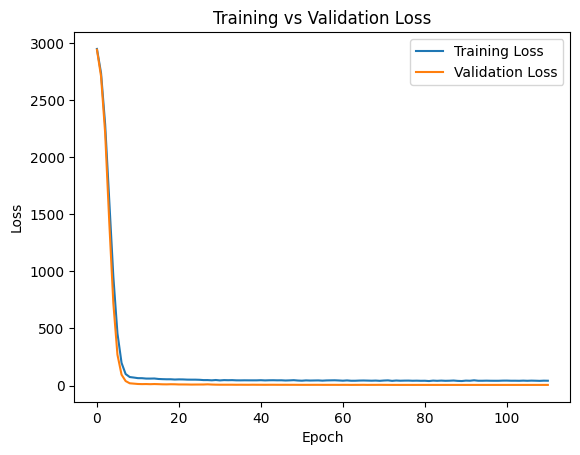

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.9422
Mean Squared Error: 3.3153


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# Load your dataset
updated_csv_path = r"/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv"
df = pd.read_csv(updated_csv_path)

df = df.dropna()

# Extract features and target values
X = df.drop(columns=["Image_Path", "Flavonoid", "Phenolic", "Tannin"], errors='ignore')
y = df[["Flavonoid", "Phenolic", "Tannin"]]

# Label encode categorical columns and scale features
from sklearn.preprocessing import LabelEncoder, StandardScaler

target_cols = ["Image_Path", "Flavonoid", "Phenolic", "Tannin"]
X = df.drop(columns=target_cols).copy()

label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoder

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build CNN Model (now fully optimized)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),  # Larger number of units and L2 regularization
    BatchNormalization(),
    Dropout(0.3),  # Higher dropout to prevent overfitting
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3)  # Output layer for Flavonoid, Phenolic, and Tannin
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks: Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


#  Actual vs Predicted Values for Sweet Basil Compounds

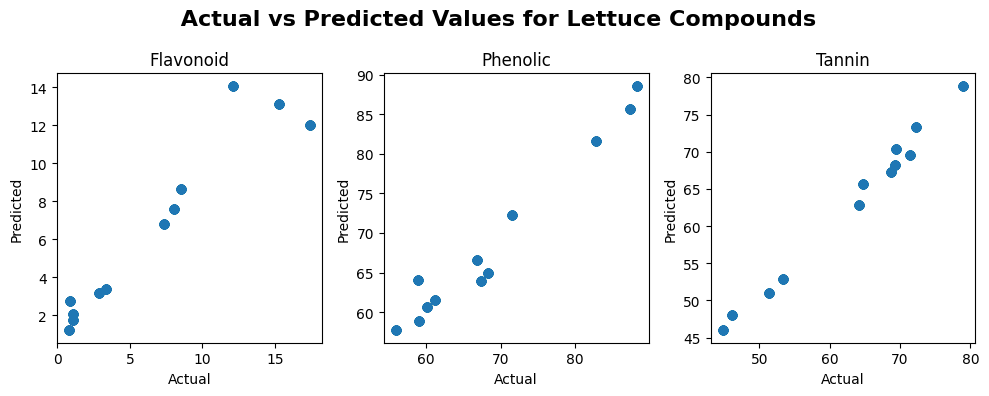

In [ ]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(["Flavonoid", "Phenolic", "Tannin"]):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.7)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(col)
plt.suptitle(" Actual vs Predicted Values for Lettuce Compounds", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#  Leaf Image Viewer and Chemical Reading Extractor

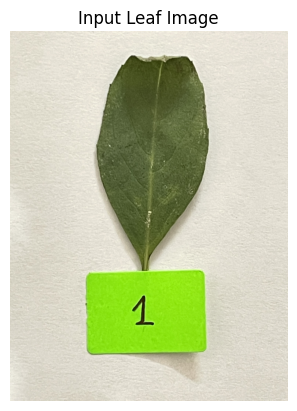


🔍 Chemical Readings from CSV:
Flavonoid: 7.35
Phenolic:  55.9
Tannin:    68.7


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# 📁 Path to your CSV containing all readings
csv_path = r"/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv"
df = pd.read_csv(csv_path)

# ✅ Normalize paths for matching (optional)
df['Image_Path'] = df['Image_Path'].str.replace('\\', '/', regex=False)

# ✅ Function to load and display image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Leaf Image")
    plt.show()

# ✅ Function to get chemical readings from CSV
def get_readings_from_csv(img_path, df):
    # Match the path
    img_path = img_path.replace('\\', '/')
    match = df[df['Image_Path'].str.endswith(os.path.basename(img_path))]

    if not match.empty:
        row = match.iloc[0]
        return {
            'Flavonoid': row['Flavonoid'],
            'Phenolic': row['Phenolic'],
            'Tannin': row['Tannin']
        }
    else:
        print("❌ Image not found in CSV.")
        return None

# ✅ Function to display readings
def display_results(readings):
    if readings:
        print("\n🔍 Chemical Readings from CSV:")
        print(f"Flavonoid: {readings['Flavonoid']}")
        print(f"Phenolic:  {readings['Phenolic']}")
        print(f"Tannin:    {readings['Tannin']}")

# ✅ Example usage
image_path = r"/content/drive/MyDrive/New leaf jpg/Control 1 Set 1/IMG_3783.jpg"  # change this to test

display_image(image_path)
readings = get_readings_from_csv(image_path, df)
display_results(readings)


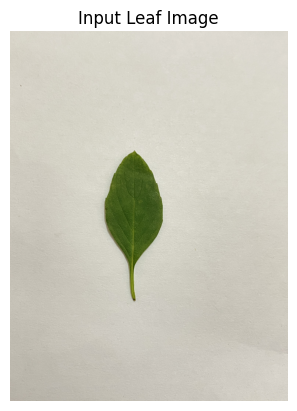


🔍 Chemical Readings from CSV:
Flavonoid: 12.1
Phenolic:  67.4
Tannin:    44.8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# 📁 Path to your CSV containing all readings
csv_path = r"/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv"
df = pd.read_csv(csv_path)

# ✅ Normalize paths for matching (optional)
df['Image_Path'] = df['Image_Path'].str.replace('\\', '/', regex=False)

# ✅ Function to load and display image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Leaf Image")
    plt.show()

# ✅ Function to get chemical readings from CSV
def get_readings_from_csv(img_path, df):
    # Match the path
    img_path = img_path.replace('\\', '/')
    match = df[df['Image_Path'].str.endswith(os.path.basename(img_path))]

    if not match.empty:
        row = match.iloc[0]
        return {
            'Flavonoid': row['Flavonoid'],
            'Phenolic': row['Phenolic'],
            'Tannin': row['Tannin']
        }
    else:
        print("❌ Image not found in CSV.")
        return None

# ✅ Function to display readings
def display_results(readings):
    if readings:
        print("\n🔍 Chemical Readings from CSV:")
        print(f"Flavonoid: {readings['Flavonoid']}")
        print(f"Phenolic:  {readings['Phenolic']}")
        print(f"Tannin:    {readings['Tannin']}")

# ✅ Example usage
image_path = r"/content/drive/MyDrive/New leaf jpg/Ascorbic 1 Set 1/IMG_2173.jpg"  # change this to test

display_image(image_path)
readings = get_readings_from_csv(image_path, df)
display_results(readings)


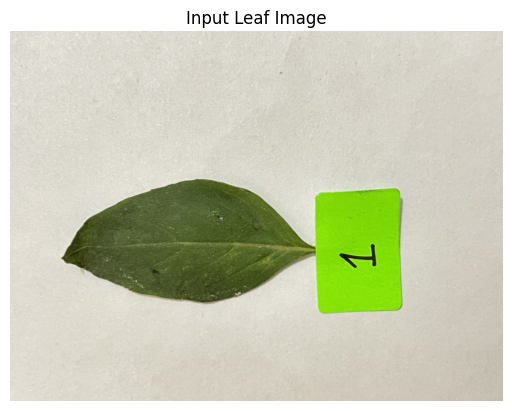


🔍 Chemical Readings from CSV:
Flavonoid: 0.8
Phenolic:  60.1
Tannin:    64.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# 📁 Path to your CSV containing all readings
csv_path = r"/content/drive/MyDrive/New leaf jpg/leaf_images_with_chemical_readings.csv"
df = pd.read_csv(csv_path)

# ✅ Normalize paths for matching (optional)
df['Image_Path'] = df['Image_Path'].str.replace('\\', '/', regex=False)

# ✅ Function to load and display image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Leaf Image")
    plt.show()

# ✅ Function to get chemical readings from CSV
def get_readings_from_csv(img_path, df):
    # Match the path
    img_path = img_path.replace('\\', '/')
    match = df[df['Image_Path'].str.endswith(os.path.basename(img_path))]

    if not match.empty:
        row = match.iloc[0]
        return {
            'Flavonoid': row['Flavonoid'],
            'Phenolic': row['Phenolic'],
            'Tannin': row['Tannin']
        }
    else:
        print("❌ Image not found in CSV.")
        return None

# ✅ Function to display readings
def display_results(readings):
    if readings:
        print("\n🔍 Chemical Readings from CSV:")
        print(f"Flavonoid: {readings['Flavonoid']}")
        print(f"Phenolic:  {readings['Phenolic']}")
        print(f"Tannin:    {readings['Tannin']}")

# ✅ Example usage
image_path = r"/content/drive/MyDrive/New leaf jpg/Citric 1 Set 1/IMG_2969.jpg"  # change this to test

display_image(image_path)
readings = get_readings_from_csv(image_path, df)
display_results(readings)
